# K-Nearest Neighbours

We previously learned how to generate synthetic data for experimenting with Machine Learning algorithms. We shall now study the effect of the hyperparameter 'k' in the K-Nearest Neighbours algorithm using synthetic data.

In [101]:
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

First, let us generate 2-dimensional data for a two-class problem, using the function below. For each class, generate 100 points from a 2D Gaussian distribution.

In [102]:
# Function for generating 2d 2-class data
def generate_2d_data(class1Mean, class1Cov, class2Mean, class2Cov):
    
    np.random.seed(1)
    
    #generating class1 data
    class1x, class1y = np.random.multivariate_normal(class1Mean, class1Cov, 100).T 
    #generating class2 data
    class2x, class2y = np.random.multivariate_normal(class2Mean, class2Cov, 100).T
    
    #generating input data using two classes data
    X = np.column_stack([np.append(class1x,class2x),np.append(class1y,class2y)])
    
    #generating output data as two classes distinguished by quantitative labels 0 or 1 representing some categorical values
    y = [0]*100 + [1]*100 

    # Plotting the 2-class data
    plt.title('Plotting 2-dimensional 2-class data')
    plt.scatter(X[:100,0], X[:100,1], color = 'b', label = 'Class 1')
    plt.scatter(X[100:,0], X[100:,1], color = 'r', label = 'Class 2')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
    params = [class1Mean, class1Cov, class2Mean, class2Cov]
    
    return X,y,params

Now for each class, we will generate a Gaussian distribution with unit covariance. Let the means for each class be at (0,0) and (4,4) respectively. Set the parameters `class1Mean, class1Cov, class2Mean and class2Cov` to generate this data.

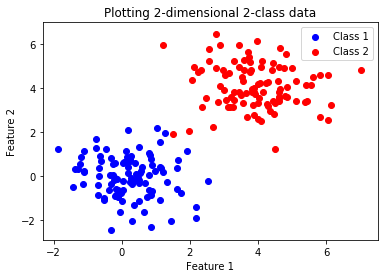

In [103]:
#class1 mean 0 and covariance 1
class1Mean=[0, 0]
class1Cov=[[1, 0], [0,1]]

#class2 mean 4 and covariance 1
class2Mean = [4, 4]
class2Cov = [[1, 0], [0,1]]

#generating dataset and plotting 2D 2-Class Data
X,y,params = generate_2d_data(class1Mean, class1Cov, class2Mean, class2Cov)

In [104]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


Now classify the generated data with the K-Nearest Neighbours algorithm, and study the variation in performance from k=1 up to k=50. Use 40% of the data for testing the model, and 60% for training.

In [105]:
def classify_KNN(X,y):
    # Splitting the data into training and validation sets
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

    neighbors = np.arange(1,50)
    train_accuracy =np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))

    for i,k in enumerate(neighbors):
        #Setup a knn classifier with k neighbors
        knn = KNeighborsClassifier(n_neighbors=k)

        #Fit the model
        knn.fit(X_train, y_train)

        #Compute accuracy on the training set
        train_accuracy[i] = knn.score(X_train, y_train)
        #Compute accuracy on the test set
        test_accuracy[i] = knn.score(X_test, y_test)
    
    return train_accuracy, test_accuracy

def plot(accuracy, num_neighbours=25):

    #Generating accuracy plots
    neighbors=np.arange(1,num_neighbours)
    plt.title('k-NN Testing Accuracy on varying number of neighbors')
    plt.plot(neighbors, accuracy, label='Testing Accuracy')
    plt.xlabel('Number of neighbors')
    plt.ylabel('Accuracy')
    plt.show()

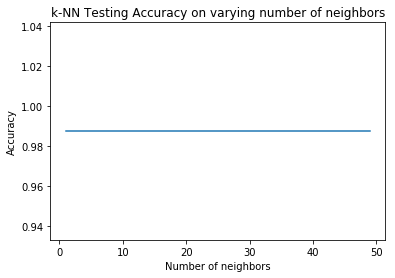

In [106]:
train_accuracy, test_accuracy = classify_KNN(X,y)
plot(test_accuracy,50)

In [107]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


Now generate a similar dataset with means at (0,0) and (0.5,0.5) instead, and run the classifier again. Observe the performance of the classifier with 'k'.

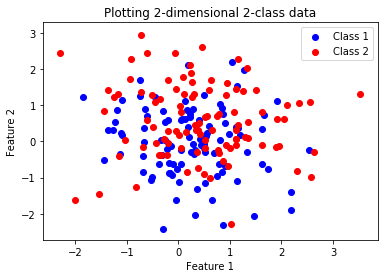

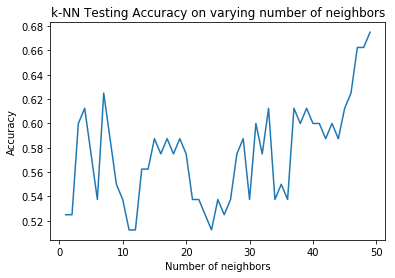

In [112]:
#class1 mean 0 and covariance 1
class1Mean=[0, 0]
class1Cov=[[1, 0], [0,1]]

#class2 mean 0.5 and covariance 1
class2Mean = [0.5, 0.5]
class2Cov = [[1, 0], [0,1]]

#generating dataset and plotting 2D 2-Class Data
X,y,params = generate_2d_data(class1Mean, class1Cov, class2Mean, class2Cov)

#generating training and test accuracy for various values of k
train_accuracy, test_accuracy = classify_KNN(X,y)

#plotting test accuracy for various values of k
plot(test_accuracy,50)

In [109]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


Now generate the dataset with means at (0,0) and (1,1), and run the classifier again. Observe the performance of the classifier with 'k'. Is the trend different from the previous examples?

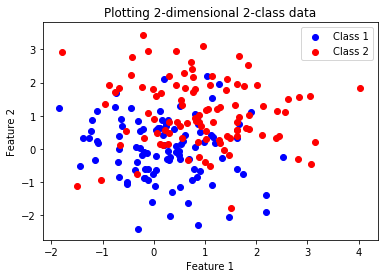

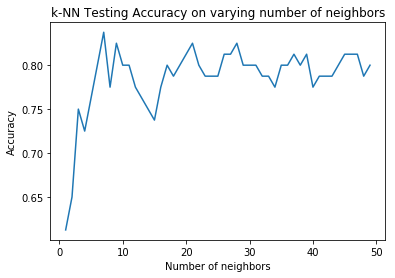

In [110]:
#class1 mean 0 and covariance 1
class1Mean=[0, 0]
class1Cov=[[1, 0], [0,1]]

#class1 mean 1 and covariance 1
class2Mean = [1, 1]
class2Cov = [[1, 0], [0,1]]

#generating dataset and plotting 2D 2-Class Data
X,y,params = generate_2d_data(class1Mean, class1Cov, class2Mean, class2Cov)

#generating training and test accuracy for various values of k
train_accuracy, test_accuracy = classify_KNN(X,y)

#plotting test accuracy for various values of k
plot(test_accuracy,50)

In [111]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


Based on the above experiments, try to make a conclusion about how the number of neighbours 'k' for effective classification depends on the dataset.

Number of neighbours hyperparameter 'k' for effective classification depends on the way the data points of classes are overlapped in dataset,

If there is no overlap or very little overlap in data points of classes in dataset, as in Case 1 guassian distribution with  means 0 and 4, We can achieve effective classification even at very low values of k such as k=1,2..., this is because almost all the datapoints have clear distinction of classes.

If there is complete overlap in data points of classes in dataset, as in Case 2 guassian distribution with  means 0 and 0.5, We can achieve effective classification only at high values of k, this is because there is no clear distinction in classes of datapoints.

If there is moderate overlap in data points of classes in dataset, as in Case 3 guassian distribution with  means 0 and 1, We can achieve effective classification for some values of k,  as the small values of k are affected by noise with clear seperation between classes and higher values of k tend to make the decision boundaries between classes less distinct.
